In [769]:
# !pip install matplotlib

Guanaco_responses/Tell/CoT/length_3/sample_3/order_2.txt
Guanaco_responses/Tell/CoT/length_3/sample_3/order_4.txt
Guanaco_responses/Tell/CoT/length_3/sample_4/order_4.txt
Guanaco_responses/Tell/CoT/length_3/sample_10/order_4.txt
0.41333333333333333 248 600
0.2733333333333333 164 600


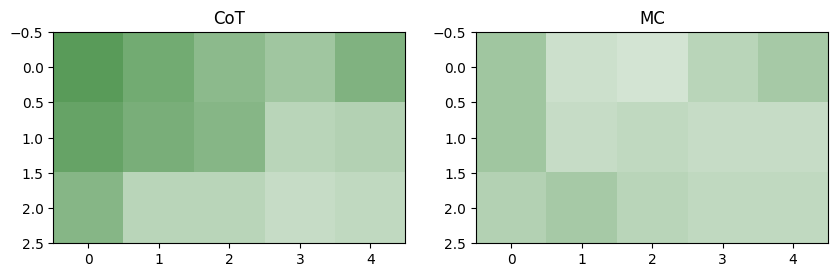

In [1]:
import os
size = 65
# result_folder = "results_65/prompt_ToMh"
result_folder ="Guanaco_responses"
# result_folder ="result_prompt_ToMh_old_v0"
# result_folder = "results_65"
ans_folder = "data_ToMh_old"
flag = False

cor = 0
n = 0
unk = 0
def acc(t, l, o):
    global cor, n, unk
    cnt = 0
    correct = 0
    # Iterate over all files and subdirectories within the root folder
    for folder_name, subfolders, filenames in os.walk(result_folder):
        for filename in filenames:
            if filename.endswith(".txt"):
                if all([i in folder_name for i in [t, f'length_{l}']]) and f'order_{o}' in filename:
                    cnt += 1
                    ans_folder_name = folder_name.replace(result_folder, ans_folder)
                    with open(os.path.join(ans_folder_name, filename), "r") as f:
                        output = f.read()
                        ans = output[output.find('Answer: '):]
                        ans = ans[:ans.find('\n')]
                        ans = ans.split()[-1]
                        choice = output[output.find('Choices:'):]
                        choice = choice[:choice.find('\n')]
#                         print(choice)
#                         break
                        ans_choice = choice[choice.find(ans)-3]
                        ans = ans.replace('_',' ')

                    with open(os.path.join(folder_name, filename), "r") as f:
                        result = f.read()
#                             print(result,'h1')
                        if t=='CoT': 
                            result = result.split('\n')[-1]
                        else:
                            result = result[result.find(':')+1:]
                        if (len(result)==0 or 'more information' in result):
                            print(os.path.join(folder_name, filename))
                            unk += 1
                        
                        result = result.replace('_',' ')
                        ans_exist = (result.lower()).find(ans)
                        choice_exist = result.find(ans_choice)
#                     print(folder_name, filename)
#                     print(result)
#                     print('')
                    if (ans_exist != -1) and  t=='CoT':
                        correct +=1
                    elif (choice_exist != -1) and  t=='MC':
                        correct += 1    

#                     if (ans_exist!=-1 or choice_exist!=-1):
#                         correct +=1
    cor += correct
    n += cnt
    return correct / (cnt+0.001)
    return cnt

import numpy as np
a = np.zeros((2,3,5))
task  = ['CoT','MC']
for t in [0,1]:
    for i in [1,2,3]:
        for j in [0,1,2,3,4]:
            a[t][i-1][j]=acc(task[t],i,j)
    print(cor /n, cor, n)
    cor = n = 0
# unk
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create two subplots
data = a
# Create a custom colormap from green (1) to white (0)
colors = [(1, 1, 1),(0, 0.4, 0)]
cmap = LinearSegmentedColormap.from_list('darkgreen_to_white', colors)

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first figure
axs[0].imshow(data[0], cmap=cmap, interpolation='nearest', vmin=0, vmax=1)
axs[0].set_title('CoT')

# Plot the second figure
axs[1].imshow(data[1], cmap=cmap, interpolation='nearest', vmin=0, vmax=1)
axs[1].set_title('MC')

# Show the figures
plt.show()

In [2]:
a

array([[[0.64998375, 0.54998625, 0.44998875, 0.37499063, 0.4999875 ],
        [0.599985  , 0.52498688, 0.47498813, 0.27499313, 0.2999925 ],
        [0.47498813, 0.27499313, 0.27499313, 0.22499438, 0.24999375]],

       [[0.37499063, 0.199995  , 0.17499563, 0.27499313, 0.34999125],
        [0.37499063, 0.22499438, 0.24999375, 0.22499438, 0.22499438],
        [0.2999925 , 0.34999125, 0.27499313, 0.24999375, 0.24999375]]])